In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.DataFrame({
    'weight': [51, 62, 69, 64, 65, 56, 58, 57, 55],
    'height': [107, 182, 175, 173, 172, 174, 169, 173, 170],
    'class': ['Under', 'Normal', 'Normal', 'Normal', 'Normal',
             'Normal', 'Under', 'Normal', 'Normal']
})

In [4]:
df.head()

,weight,height,class
0,51,107,Under
1,62,182,Normal
2,69,175,Normal
3,64,173,Normal
4,65,172,Normal


In [5]:
def euclidian_distance(x1, y1, x2, y2):
    distance = math.sqrt((x2-x1)**2 +(y2-y1)**2)
    return distance

In [6]:
new_point = {'weight': 57, 'height': 170}

In [7]:
import math
distance = []
x1 = new_point['weight']
y1 = new_point['height']
for i in range(len(df)):
    x2 = df.iloc[i]['weight']
    y2 = df.iloc[i]['height']
    dist = euclidian_distance(x1, y1, x2, y2)
    distance.append(dist)
    print(x1, y1, x2, y2, dist)

57 170 51 107 63.28506932918696
57 170 62 182 13.0
57 170 69 175 13.0
57 170 64 173 7.615773105863909
57 170 65 172 8.246211251235321
57 170 56 174 4.123105625617661
57 170 58 169 1.4142135623730951
57 170 57 173 3.0
57 170 55 170 2.0


In [8]:
df['distance'] = distance
df.head()

,weight,height,class,distance
0,51,107,Under,63.285069
1,62,182,Normal,13.000000
2,69,175,Normal,13.000000
3,64,173,Normal,7.615773
4,65,172,Normal,8.246211


In [9]:
print(df.sort_values(by='distance', ascending=True))

   weight  height   class   distance
6      58     169   Under   1.414214
8      55     170  Normal   2.000000
7      57     173  Normal   3.000000
5      56     174  Normal   4.123106
3      64     173  Normal   7.615773
4      65     172  Normal   8.246211
1      62     182  Normal  13.000000
2      69     175  Normal  13.000000
0      51     107   Under  63.285069


In [10]:
df = pd.read_csv('diabetes.csv')

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.shape

(768, 9)

In [13]:
df.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [14]:
for column in df.columns[:-1]:
    if (df[column] == 0).any():
        mean = int(df[column].mean(skipna = True))
        df[column] = df[column].replace(0, mean)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,3,137,40,35,168,43.1,2.288,33,1


In [16]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                   random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,3,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,20,79,22.4,0.207,27
270,10,101,86,37,79,45.6,1.136,38
435,3,141,69,20,79,42.4,0.205,29


In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-1.07716133, -0.89556874, -0.99332564, ..., -1.20189959,
        -0.61421636, -0.94861028],
       [ 0.2902988 , -0.56346432, -0.01037257, ...,  0.6661343 ,
        -0.90973787, -0.43466673],
       [-0.39343127,  0.43284895, -0.33802359, ...,  1.44208685,
        -0.30699103, -0.77729576],
       ...,
       [ 1.99962396, -0.69630609,  1.13640602, ...,  1.91628007,
         1.94892066,  0.42190587],
       [-0.39343127,  0.6321116 , -0.25611083, ...,  1.45645634,
        -0.77514391, -0.34900947],
       [-0.39343127,  0.10074453,  1.95553358, ..., -1.40307247,
        -0.60836445, -1.03426754]])

In [20]:
k = np.round(np.sqrt(df.shape[0]))
k

28.0

In [21]:
from sklearn.neighbors import KNeighborsClassifier
cls = KNeighborsClassifier(n_neighbors=int(k), p=2, metric='euclidean')
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [28]:
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       151
           1       0.67      0.50      0.57        80

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231

[[131  20]
 [ 40  40]]
0.7402597402597403


In [30]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

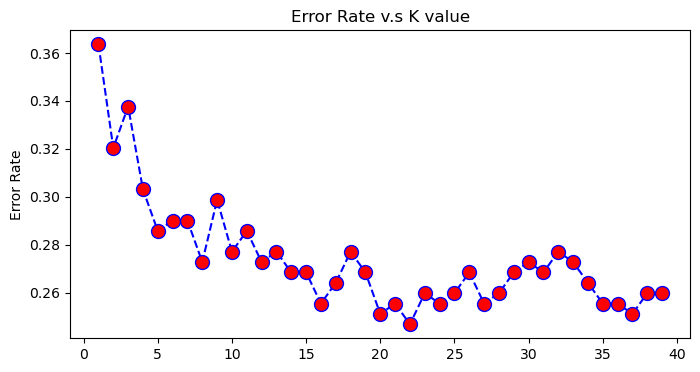

In [31]:
plt.figure(figsize=(8,4))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate v.s K value')
plt.ylabel('Error Rate')

In [33]:
cls = KNeighborsClassifier(n_neighbors=23, p=2, metric='euclidean')
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       151
           1       0.66      0.53      0.58        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

[[129  22]
 [ 38  42]]
0.7402597402597403
